In [ ]:
! pip install q kaggle
from google.colab import files
import pandas as pd
import numpy as np
from google.colab import autoviz
import seaborn as sns
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


# Google Colab Lab Assignment -Pretrained Modle

*Course Name:* Deep Learning

*Lab Title:* Research Paper Implementation with Pre-trained Model 'TRANSFER LEARNING: INCEPTION-V3 BASED CUSTOM CLASSIFICATION
APPROACH FOR FOOD IMAGES'

*Student Name:* Nirmal Chaturvedi

*PRN No:*202201040210

*Date of Submission:* 26/2/2025

*Group Members*:
1.	Nirmal Chaturvedi
Prn- 202201040210
2.	Vivek Borade
Prn- 202201040216
3.	Abhijeet Jadhav
Prn- 202201040122

                  

*Research Paper Study and Implementation*

*Instructions:*

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.
*Objective*
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.

*Task 1: Research Paper Selection and Dataset Preparation (2 hours)*

*Instructions:*

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(*Mention Dataset Link and Description*)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

import cv2

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers,models

RESEARCH PAPER TILE

TRANSFER LEARNING: INCEPTION-V3 BASED CUSTOM CLASSIFICATION

APPROACH FOR FOOD IMAGES
LINK->

https://drive.google.com/file/d/1c9BXSo-8fdmU1wbqYaDQ0lidyGyfVyL-/view?usp=sharing


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import shutil

shutil.rmtree('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1', ignore_errors=True)


In [ ]:
import kagglehub
import os
import splitfolders

# Define dataset name
data_path = 'l33tc0d3r/indian-food-classification'

# Download dataset
path = kagglehub.dataset_download(data_path)

# Print path to verify
print("Dataset downloaded to:", path)

# Check if the path exists
if not os.path.exists(path):
    raise ValueError(f"Dataset path {path} does not exist. Check the download process.")

# Output folder for split data
output_folder = '/kaggle/working/'

# Split ratio
split_ratio = (0.8, 0.1, 0.1)

# Perform the split
splitfolders.ratio(
    input=path,  # Make sure this path exists
    output=output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None
)


100%|██████████| 1.48G/1.48G [00:15<00:00, 100MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1


Copying files: 0 files [00:00, ? files/s]


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification"
categories = os.listdir(dataset_path)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        print(f"{category}: {len(os.listdir(category_path))} files")


kadai_paneer: 412 files
pav_bhaji: 353 files
butter_naan: 329 files
kaathi_rolls: 293 files
idli: 310 files
chole_bhature: 411 files
jalebi: 297 files
pakode: 278 files
fried_rice: 355 files
kulfi: 237 files
dhokla: 289 files
pizza: 261 files
chapati: 413 files
samosa: 262 files
paani_puri: 130 files
burger: 309 files
momos: 319 files
chai: 381 files
dal_makhani: 321 files
masala_dosa: 311 files


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1"

for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Directory: {root}")
    print(f"📁 Subdirectories: {dirs}")
    print(f"📄 Files: {files}\n")


📂 Directory: /root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1
📁 Subdirectories: ['Food Classification']
📄 Files: []

📂 Directory: /root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification
📁 Subdirectories: ['kadai_paneer', 'pav_bhaji', 'butter_naan', 'kaathi_rolls', 'idli', 'chole_bhature', 'jalebi', 'pakode', 'fried_rice', 'kulfi', 'dhokla', 'pizza', 'chapati', 'samosa', 'paani_puri', 'burger', 'momos', 'chai', 'dal_makhani', 'masala_dosa']
📄 Files: []

📂 Directory: /root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/kadai_paneer
📁 Subdirectories: []
📄 Files: ['409.jpg', '237.jpg', '007.jpg', '256.jpg', '250.jpg', '038.jpg', '135.jpg', '351.jpg', '013.jpg', '395.jpg', '065.jpg', '230.jpg', '243.jpg', '285.jpg', '361.jpg', '204.jpg', '006.jpg', '127.jpg', '308.jpg', '266.jpg', '271.jpg', '059.jpg', '264.jpg', '052.jpg', '387.jpg', '347.jpg', '310.jpg', '295.jpg', '01

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification"

total_files = sum([len(files) for _, _, files in os.walk(dataset_path)])
print(f"📄 Total images found: {total_files}")


📄 Total images found: 6271


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification"  # Update path

datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(train_dir)

num_classes = len(train_generator.class_indices)  # Get number of categories
print(f"Number of classes: {num_classes}")


Found 6269 images belonging to 20 classes.
Number of classes: 20


In [ ]:
import splitfolders

output_folder = "/kaggle/working/"

splitfolders.ratio(
    input=dataset_path,
    output=output_folder,
    seed=500,
    ratio=(0.8, 0.1, 0.1),
    group_prefix=None
)

print("✅ Dataset successfully split!")


Copying files: 6271 files [00:05, 1066.01 files/s]

✅ Dataset successfully split!


In [ ]:
import splitfolders
import kagglehub
data_path = 'l33tc0d3r/indian-food-classification'
output_folder='/kaggle/working/'

split_ratio=(0.8, 0.1, 0.1)

# Use the 'path' variable obtained from kagglehub.dataset_download() as the input folder
splitfolders.ratio(
    path,  # Corrected input_folder to path
    output=output_folder,
    seed=500,
    ratio=split_ratio,
    group_prefix=None
)

Copying files: 0 files [00:00, ? files/s]


In [ ]:
img_size=(224, 224)

batch_size=32

In [ ]:
train_datagen=ImageDataGenerator(

    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
import os

train_dir=os.path.join(output_folder, 'train')

val_dir=os.path.join(output_folder, 'val')

test_dir=os.path.join(output_folder, 'test')

In [ ]:
train_data=train_datagen.flow_from_directory(

    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


test_data=test_datagen.flow_from_directory(

    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


valid_data=valid_datagen.flow_from_directory(

    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5006 images belonging to 21 classes.
Found 644 images belonging to 21 classes.
Found 619 images belonging to 21 classes.


In [ ]:
burger=os.listdir('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/burger')

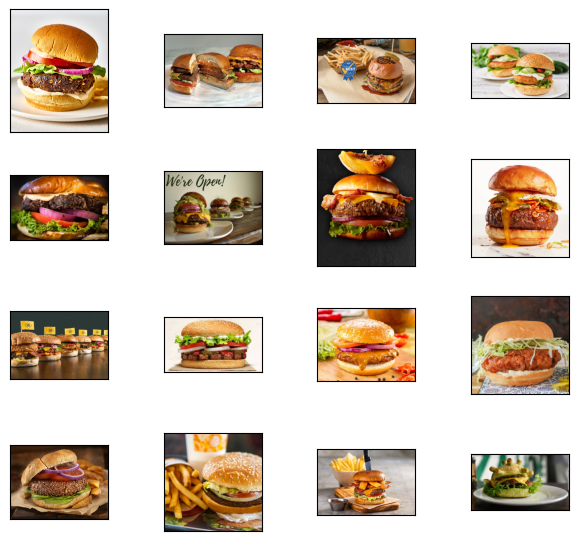

In [ ]:
import matplotlib.image as mpimg
from matplotlib.image import imread
import random
from os import listdir


plt.figure(figsize=(6,6))

for i in range(1,17):
    path='/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/burger'

    plt.subplot(4,4,i)
    plt.tight_layout()

    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

In [ ]:
butter_naan=os.listdir('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/butter_naan')

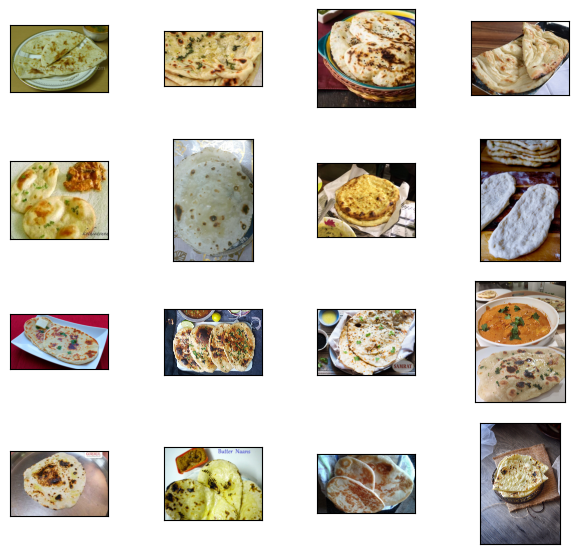

In [ ]:
plt.figure(figsize=(6,6))

for i in range(1,17):
    path='/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/butter_naan'

    plt.subplot(4,4,i)
    plt.tight_layout()

    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

In [ ]:
chai=os.listdir('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/chai')

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification"


In [ ]:
import splitfolders

output_folder = "/kaggle/working/"

splitfolders.ratio(
    input=dataset_path,  # Now pointing directly to "Food Classification"
    output=output_folder,
    seed=500,
    ratio=(0.8, 0.1, 0.1),  # 80% train, 10% val, 10% test
    group_prefix=None
)

print("✅ Splitting completed!")


Copying files: 6271 files [00:10, 623.80 files/s]

✅ Splitting completed!


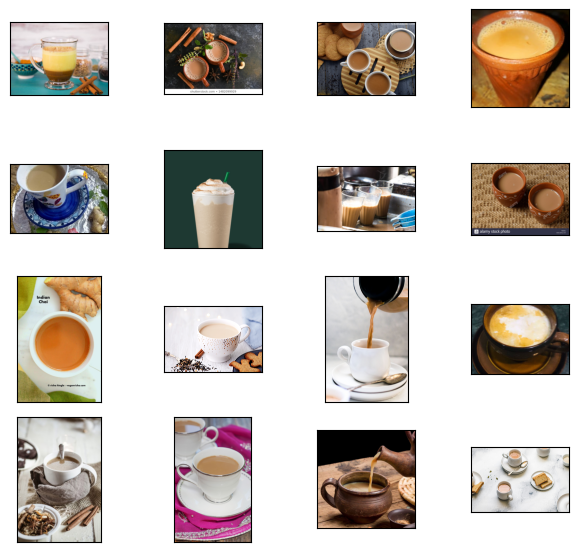

In [ ]:
plt.figure(figsize=(6,6))

for i in range(1,17):
    path='/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/chai'

    plt.subplot(4,4,i)
    plt.tight_layout()

    ramd_img=imread(path +'/'+random.choice(sorted(listdir(path))))
    plt.imshow(ramd_img)

    # off the labels
    plt.xticks([])
    plt.yticks([])

Load a  pretrained model

*Task 2: Model Implementation and Fine-tuning*

*Instructions:*

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define input image size
img_size = (299, 299)  # InceptionV3 requires at least 75x75, but typically uses 299x299

# Load InceptionV3 with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

# Define number of classes
num_classes = 20

# Ensure predictions layer is correctly connected
predictions = Dense(num_classes, activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)  # Fixed the missing model definition

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 149, 149, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_282   │ (None, 149, 149, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 149, 149, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 147, 147, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_283   │ (None, 147, 147, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 147, 147, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 147, 147, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_284   │ (None, 147, 147, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 73, 73, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_285   │ (None, 73, 73, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 73, 73, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 22,862,132 (87.21 MB)

 Trainable params: 1,059,348 (4.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

10 epoches

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input image size (299x299 for InceptionV3)
img_size = (299, 299)
batch_size = 32
num_classes = 20  # Update this based on your dataset

# Load InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Define ImageDataGenerator for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% for validation
)

train_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,  # Resize images to match InceptionV3 input
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(train_data, epochs=10, validation_data=valid_data)


Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,862,132 (87.21 MB)

 Trainable params: 1,059,348 (4.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.2200 - loss: 2.6886 - val_accuracy: 0.7373 - val_loss: 1.2650
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.5641 - loss: 1.5552 - val_accuracy: 0.8129 - val_loss: 0.8380
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6684 - loss: 1.1903 - val_accuracy: 0.8321 - val_loss: 0.6833
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.7008 - loss: 1.0682 - val_accuracy: 0.8522 - val_loss: 0.5724
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.7288 - loss: 0.9430 - val_accuracy: 0.8602 - val_loss: 0.5316
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.7470 - loss: 0.8845 - val_accuracy: 0.8570 - val_loss: 0.5219
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.7635 - loss: 0.8464 - val_accuracy: 0.8627 - val_loss: 0.4694
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7681 - loss: 0.8017 - val_accu

15 Epoches

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input image size (299x299 for InceptionV3)
img_size = (299, 299)
batch_size = 32
num_classes = 20  # Update this based on your dataset

# Load InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Define ImageDataGenerator for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% for validation
)

train_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,  # Resize images to match InceptionV3 input
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(train_data, epochs=15, validation_data=valid_data)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,862,132 (87.21 MB)

 Trainable params: 1,059,348 (4.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.2273 - loss: 2.6541 - val_accuracy: 0.7301 - val_loss: 1.2952
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.5715 - loss: 1.5727 - val_accuracy: 0.8032 - val_loss: 0.8583
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6504 - loss: 1.2290 - val_accuracy: 0.8361 - val_loss: 0.6758
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7016 - loss: 1.0814 - val_accuracy: 0.8514 - val_loss: 0.5784
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7179 - loss: 0.9861 - val_accuracy: 0.8434 - val_loss: 0.5380
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7467 - loss: 0.8753 - val_accuracy: 0.8586 - val_loss: 0.5115
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7470 - loss: 0.8884 - val_accuracy: 0.8747 - val_loss: 0.4737
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.7664 - loss: 0.8301 - val_accu

25 Epoches

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input image size (299x299 for InceptionV3)
img_size = (299, 299)
batch_size = 32
num_classes = 20  # Update this based on your dataset

# Load InceptionV3 model with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Define ImageDataGenerator for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% for validation
)

train_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,  # Resize images to match InceptionV3 input
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(train_data, epochs=25, validation_data=valid_data)


Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,862,132 (87.21 MB)

 Trainable params: 1,059,348 (4.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.2125 - loss: 2.6771 - val_accuracy: 0.7044 - val_loss: 1.3259
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.5675 - loss: 1.5492 - val_accuracy: 0.8032 - val_loss: 0.8604
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.6396 - loss: 1.2697 - val_accuracy: 0.8321 - val_loss: 0.6667
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6965 - loss: 1.0510 - val_accuracy: 0.8498 - val_loss: 0.5931
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.7283 - loss: 0.9595 - val_accuracy: 0.8514 - val_loss: 0.5382
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7392 - loss: 0.8950 - val_accuracy: 0.8643 - val_loss: 0.5003
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7532 - loss: 0.8577 - val_accuracy: 0.8586 - val_loss: 0.4749
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.7687 - loss: 0.8265 - val_accu

In [ ]:
# Load test data with the same preprocessing as train data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test set

test_data = test_datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),  # 🔥 Must match model input size
    batch_size=32,
    class_mode='categorical',  # 🔥 Ensures labels are one-hot encoded
    shuffle=False
)

# Evaluate model
loss, accuracy = model.evaluate(test_data)

print("Model Accuracy: ", accuracy)


Found 6269 images belonging to 20 classes.
196/196 ━━━━━━━━━━━━━━━━━━━━ 109s 552ms/step - accuracy: 0.9223 - loss: 0.2685
Model Accuracy:  0.901898205280304


In [ ]:
def predict_image(image, model):
    test_img=cv2.imread(image)
    plt.imshow(test_img)

    test_img=cv2.resize(test_img, (224,224))
    test_img=np.expand_dims(test_img, axis=0)

    result=model.predict(test_img)

    r=np.argmax(result)
    print(class_names[r])

In [ ]:
class_names={
    0:'burger' ,1:'butter_naan' ,2:'chai' ,3:'chapati' ,4:'chole_bhature' ,5:'dal_makhani' ,
    6:'dhokla' ,7:'fried_rice' ,8:'idli' ,9:'jalebi' ,10:'kaathi_rolls' ,
    11:'kadai_paneer' ,12:'kulfi' ,13:'masala_dosa' ,14:'momos' ,15:'paani_puri' ,
    16:'pakode' ,17:'pav_bhaji' ,18:'pizza' ,19:'samosa'
}

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    # Load the image and resize it to (299, 299)
    img = image.load_img(img_path, target_size=(299, 299))  # 🔥 Resize to 299x299

    # Convert image to array
    img_array = image.img_to_array(img)

    # Expand dimensions to match model input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize pixel values (same as training data)
    img_array /= 255.0

    # Predict
    predictions = model.predict(img_array)

    # Get class label
    class_index = np.argmax(predictions)  # Get the index of the highest probability class

    print("Predicted Class Index:", class_index)

# 🔥 Call the function with correct input size
predict_image('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/fried_rice/007.jpg', model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class Index: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


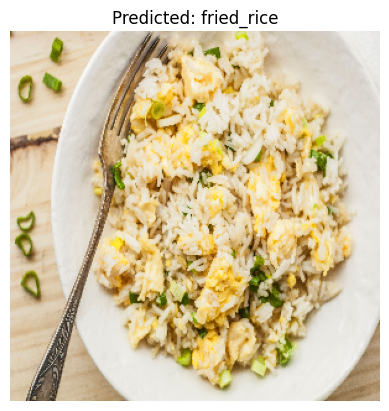

Predicted Class: fried_rice
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


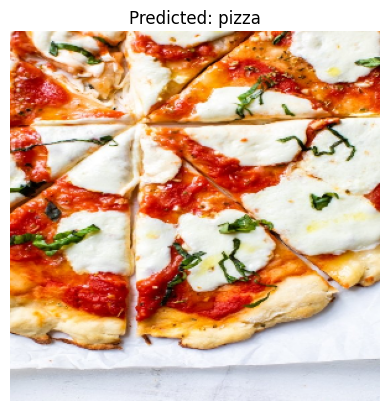

Predicted Class: pizza


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2  # For color correction

# Define class names
class_names = {
    0: 'burger', 1: 'butter_naan', 2: 'chai', 3: 'chapati', 4: 'chole_bhature', 5: 'dal_makhani',
    6: 'dhokla', 7: 'fried_rice', 8: 'idli', 9: 'jalebi', 10: 'kaathi_rolls',
    11: 'kadai_paneer', 12: 'kulfi', 13: 'masala_dosa', 14: 'momos', 15: 'paani_puri',
    16: 'pakode', 17: 'pav_bhaji', 18: 'pizza', 19: 'samosa'
}

def predict_image(img_path, model):
    # Load image using OpenCV (to ensure correct color format)
    img = cv2.imread(img_path)  # Loads in BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Resize image to match InceptionV3 input (299, 299)
    img = cv2.resize(img, (299, 299))

    # Convert image to array and normalize
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions

    # Predict
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)  # Get the highest probability class
    predicted_label = class_names[class_index]  # Map index to class name

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    print("Predicted Class:", predicted_label)

# Run the function with your image
predict_image("/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/fried_rice/007.jpg", model)
predict_image('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/pizza/020.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


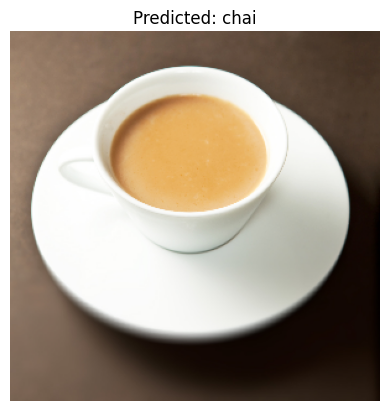

Predicted Class: chai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


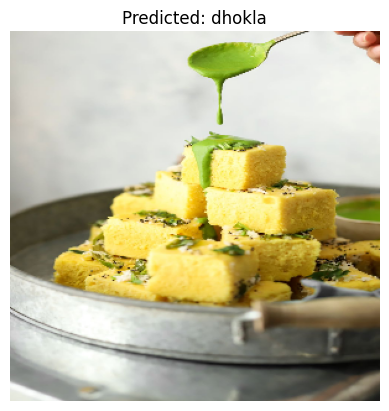

Predicted Class: dhokla


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2  # For color correction

# Define class names
class_names = {
    0: 'burger', 1: 'butter_naan', 2: 'chai', 3: 'chapati', 4: 'chole_bhature', 5: 'dal_makhani',
    6: 'dhokla', 7: 'fried_rice', 8: 'idli', 9: 'jalebi', 10: 'kaathi_rolls',
    11: 'kadai_paneer', 12: 'kulfi', 13: 'masala_dosa', 14: 'momos', 15: 'paani_puri',
    16: 'pakode', 17: 'pav_bhaji', 18: 'pizza', 19: 'samosa'
}

def predict_image(img_path, model):
    # Load image using OpenCV (to ensure correct color format)
    img = cv2.imread(img_path)  # Loads in BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Resize image to match InceptionV3 input (299, 299)
    img = cv2.resize(img, (299, 299))

    # Convert image to array and normalize
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions

    # Predict
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)  # Get the highest probability class
    predicted_label = class_names[class_index]  # Map index to class name

    # Display the image
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    print("Predicted Class:", predicted_label)

# Run the function with your image
predict_image("/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/chai/016.jpg", model)
predict_image('/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification/dhokla/010.jpg', model)

In [ ]:
# Save model in HDF5 (.h5) format
model.save("FoodiNCEPTIONv3.h5")


*Task 3: Model Evaluation and Performance Comparison*

*Instructions:*

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
*Deliverables:*

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.
Class indices: {'burger': 0, 'butter_naan': 1, 'chai': 2, 'chapati': 3, 'chole_bhature': 4, 'dal_makhani': 5, 'dhokla': 6, 'fried_rice': 7, 'idli': 8, 'jalebi': 9, 'kaathi_rolls': 10, 'kadai_paneer': 11, 'kulfi': 12, 'masala_dosa': 13, 'momos': 14, 'paani_puri': 15, 'pakode': 16, 'pav_bhaji': 17, 'pizza': 18, 'samosa': 19}
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 707ms/step - accuracy: 0.9307 - loss: 0.2240
39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 776ms/step


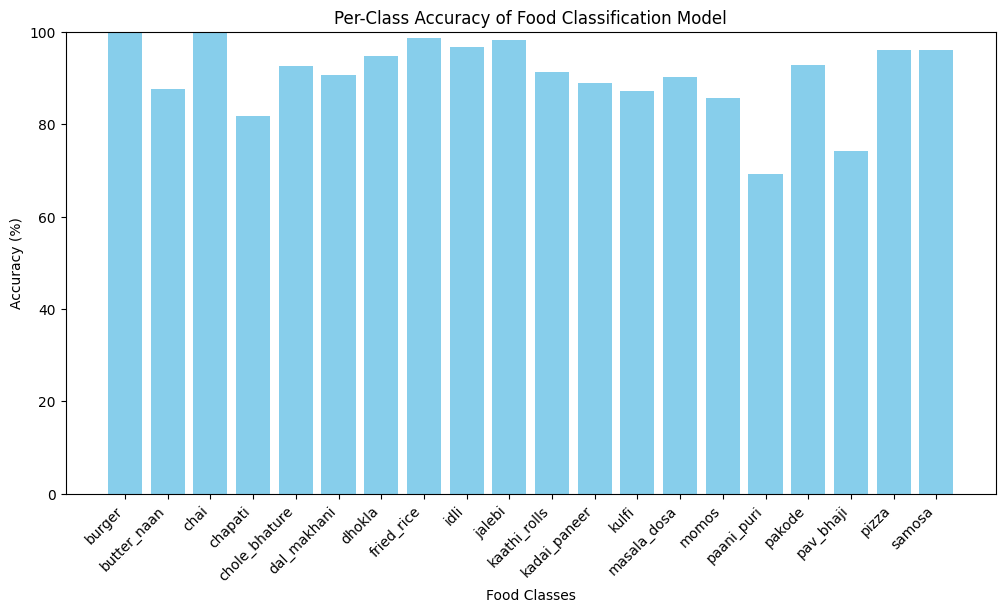

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define class names for 20 food categories
class_names = [
    'burger', 'butter_naan', 'chai', 'chapati', 'chole_bhature', 'dal_makhani', 'dhokla', 'fried_rice',
    'idli', 'jalebi', 'kaathi_rolls', 'kadai_paneer', 'kulfi', 'masala_dosa', 'momos', 'paani_puri',
    'pakode', 'pav_bhaji', 'pizza', 'samosa'
]

# Load the trained model
model = load_model("/content/FoodiNCEPTIONv3.h5")

# Recompile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Preprocess data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',  # Important for multi-class classification
    subset="training"
)

# Load validation (test) data
test_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset="validation",
    shuffle=False
)

# Print class indices to verify data loading
print("Class indices:", train_data.class_indices)

# Ensure the number of classes is 20
assert len(train_data.class_indices) == 20, "ERROR: Dataset is not recognizing 20 classes!"

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
test_accuracy *= 100  # Convert to percentage

# Get predictions
predictions = model.predict(test_data)
y_true = test_data.classes
y_pred = np.argmax(predictions, axis=1)

# Calculate accuracy for each class
class_accuracies = {}
for i, class_name in enumerate(class_names):
    mask = (y_true == i)
    if np.sum(mask) > 0:
        class_accuracies[class_name] = np.mean(y_pred[mask] == y_true[mask]) * 100
    else:
        class_accuracies[class_name] = 0

# Plot Per-Class Accuracy Bar Graph
plt.figure(figsize=(12, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Food Classes")
plt.ylabel("Accuracy (%)")
plt.title("Per-Class Accuracy of Food Classification Model")
plt.ylim(0, 100)
plt.show()


Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 133s 769ms/step - accuracy: 0.7409 - loss: 0.8643 - val_accuracy: 0.8932 - val_loss: 0.3792
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 699ms/step - accuracy: 0.7771 - loss: 0.7236 - val_accuracy: 0.8731 - val_loss: 0.3950
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 706ms/step - accuracy: 0.7952 - loss: 0.6510 - val_accuracy: 0.8835 - val_loss: 0.3684
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 114s 722ms/step - accuracy: 0.8114 - loss: 0.6128 - val_accuracy: 0.8964 - val_loss: 0.3439
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 702ms/step - accuracy: 0.8329 - loss: 0.5488 - val_accuracy: 0.8819 - val_loss: 0.3899
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 109s 692ms/step - accuracy: 0.8376 - loss: 0.5216 - val_accuracy: 0.9060 - val_loss: 0.3157
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 145s 712ms/step - accuracy: 0.8469 - loss: 0.5033 - val_accuracy: 0.9076 - val_los

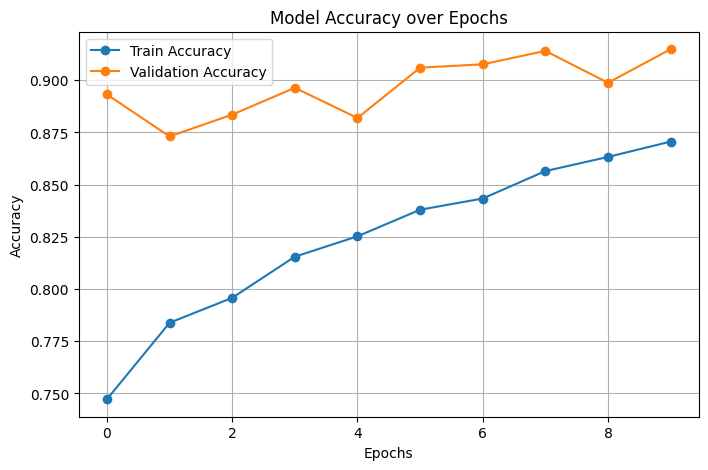

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the trained model
model = load_model("/content/FoodiNCEPTIONv3.h5")

# Recompile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Preprocess data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset="validation"
)

# Train the model and store history
history = model.fit(train_data, validation_data=val_data, epochs=10)  # Adjust epochs as needed

# Plot Accuracy over Epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label="Train Accuracy", marker='o')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.show()


Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 827ms/step - accuracy: 0.7297 - loss: 0.9058 - val_accuracy: 0.8867 - val_loss: 0.3740
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 717ms/step - accuracy: 0.7754 - loss: 0.7279 - val_accuracy: 0.8843 - val_loss: 0.3721
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 716ms/step - accuracy: 0.8092 - loss: 0.6248 - val_accuracy: 0.8908 - val_loss: 0.3583
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 112s 713ms/step - accuracy: 0.8126 - loss: 0.6222 - val_accuracy: 0.9004 - val_loss: 0.3316
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 702ms/step - accuracy: 0.8205 - loss: 0.5795 - val_accuracy: 0.8980 - val_loss: 0.3193


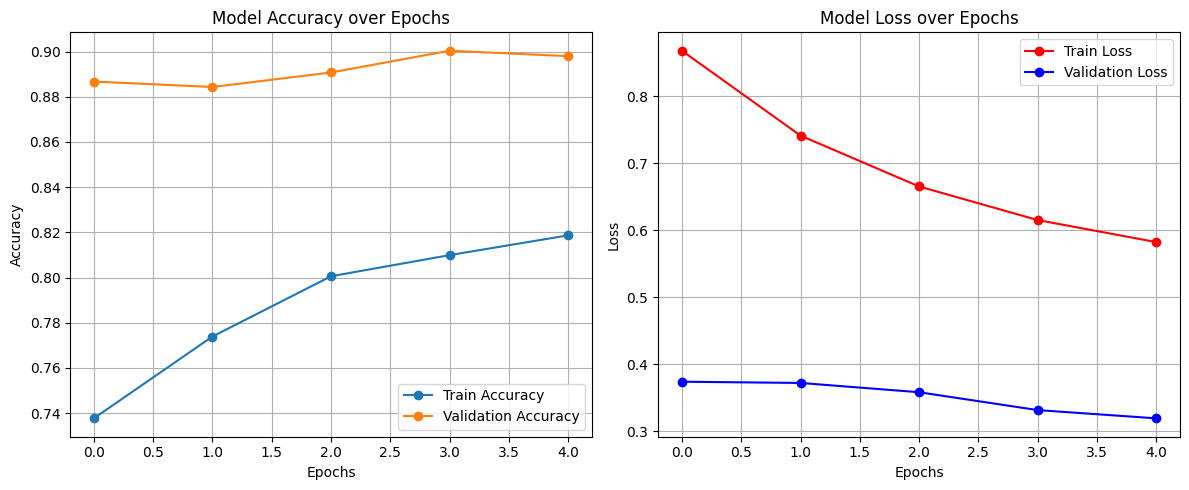

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the trained model
model = load_model("/content/FoodiNCEPTIONv3.h5")

# Recompile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Preprocess data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data
train_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/root/.cache/kagglehub/datasets/l33tc0d3r/indian-food-classification/versions/1/Food Classification",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset="validation"
)

# Train the model and store history
history = model.fit(train_data, validation_data=val_data, epochs=5)  # Adjust epochs as needed

# Plot Accuracy over Epochs
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy", marker='o')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy over Epochs")
plt.legend()
plt.grid(True)

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss", marker='o', color='red')
plt.plot(history.history['val_loss'], label="Validation Loss", marker='o', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss over Epochs")
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()
